In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
import numpy as np                                                                          
np.random.seed(100)


from models import *
from utils import *

In [2]:
def design_matrix(x_train, x_test):
  #now scale the data
  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()
  scaler.fit(x_train)
  X_train_scaled = scaler.transform(x_train)
  X_test_scaled = scaler.transform(x_test)
  return X_train_scaled , X_test_scaled

# Part g) Logistic Regression code (Wisconsin)

Test Accuracy : 
 [[0.50846142 0.71030896 0.39573048 0.46005279]
 [0.80467319 0.76780003 0.82765099 0.78902344]
 [0.9489986  0.92785282 0.95427729 0.96839   ]
 [0.97360658 0.97717746 0.98244061 0.97014439]
 [0.96839    0.98068623 0.98068623 0.9719143 ]
 [0.97368421 0.98244061 0.97542307 0.96485018]]
Test loss : 
 [[1.89604173 0.921949   2.30033219 1.98825127]
 [0.54424944 0.75298355 0.48064931 0.60115578]
 [0.14000356 0.19648786 0.13621939 0.18243024]
 [0.09167454 0.08282339 0.09460954 0.18048717]
 [0.10841221 0.07810708 0.09368849 0.1824497 ]
 [0.1383012  0.07599956 0.09609431 0.17696618]]


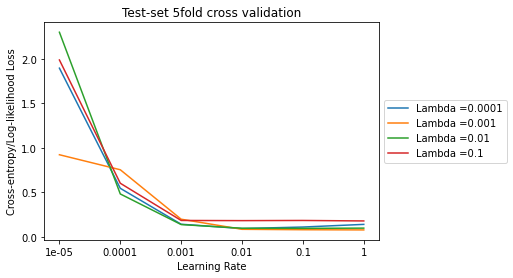

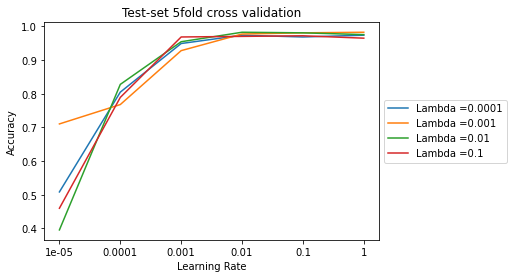

In [3]:
# Load the data
cancer = load_breast_cancer()
X, y =cancer.data,cancer.target

## Cross-validation based Logistic regression
ksplits = 5
kfold = KFold(n_splits = ksplits )
lr_eta = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
Lambdas = [1e-4, 1e-3, 1e-2, 1e-1]

est_test_acc = np.zeros((len(lr_eta), len(Lambdas) ))
est_test_loss = np.zeros((len(lr_eta), len(Lambdas) ))

for n_l, Lambda in  enumerate(Lambdas):

  for n_lr,lr in  enumerate(lr_eta):
    test_acc = np.zeros(ksplits)
    test_loss = np.zeros(ksplits)

    ## split the data into 5 folds and evaluate performance 
    for fold, (train_ind, test_ind) in enumerate(kfold.split(X)):
      X_train , X_test = X[train_ind], X[test_ind]
      y_train, y_test = y[train_ind], y[test_ind]

      ## Create design matrix with standard scaling
      X_train_scaled, X_test_scaled  = design_matrix(X_train, X_test)
  
      
      logreg = LogisticRegression(fit_intercept=False,
                  dimension= X_train_scaled.shape[1],
                  random_init=True,
                  reduction='mean',
                  l2_reg = True,
                  lbd= Lambda)
      
      logreg.simple_SGD( X_train_scaled, y_train, batch_size = 50, lr_eta = lr , n_epochs = 1000)     
        
      # find accuracy on test set with beta_opt
      y_pred_prob = np.zeros((len(y_test),2))
      y_pred_prob[:,1] = logreg.predict(X_test_scaled)
      y_pred_prob[:,0] = 1-logreg.predict(X_test_scaled)
      
      test_acc[fold] =  np.mean(np.argmax(y_pred_prob, axis=1)== y_test)
      test_loss[fold] = logreg.NLL_loss(X_test_scaled, y_test)
    
    est_test_acc[n_lr , n_l ] = np.mean(test_acc)
    est_test_loss[n_lr , n_l ] =  np.mean(test_loss)

print('Test Accuracy : \n', est_test_acc )
print('Test loss : \n', est_test_loss)

for n_l,Lambda in enumerate(Lambdas): 
  plt.plot(est_test_loss[:,n_l], label = 'Lambda ='+ str(Lambda))
  plt.xlabel('Learning Rate')
  plt.ylabel('Cross-entropy/Log-likelihood Loss')
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.xticks(np.arange(len(lr_eta)), lr_eta )
plt.title('Test-set 5fold cross validation')
plt.show()

for n_l,Lambda in enumerate(Lambdas): 
  plt.plot(est_test_acc[:,n_l], label = 'Lambda ='+ str(Lambda))
  plt.xlabel('Learning Rate')
  plt.ylabel('Accuracy')
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.xticks(np.arange(len(lr_eta)), lr_eta )
plt.title('Test-set 5fold cross validation')
plt.show()

# Part g) Scikit Learn's Logistic Regression

Test Accuracy : 
 [[0.95575221 0.95575221 0.95575221 0.95575221]
 [0.97345133 0.97345133 0.97345133 0.97345133]
 [0.99115044 0.99115044 0.99115044 0.98230088]
 [0.99115044 0.99115044 0.99115044 0.98230088]
 [0.99115044 0.98230088 0.98230088 0.95575221]
 [0.92035398 0.95575221 0.95575221 0.82300885]]
Test loss : 
 [[0.33187685 0.33192568 0.3324061  0.33981048]
 [0.18366498 0.18386955 0.18674131 0.21116342]
 [0.11538469 0.11669605 0.12301044 0.1747449 ]
 [0.07773498 0.07979309 0.09969611 0.17002252]
 [0.0465783  0.060037   0.09552654 0.15468775]
 [0.70275394 0.13023814 0.11686639 1.02096742]]


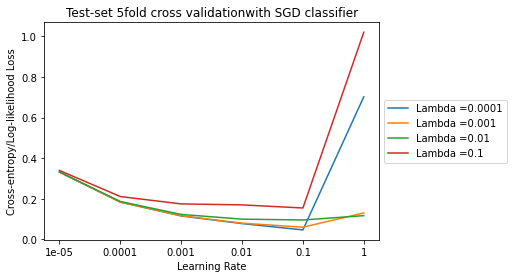

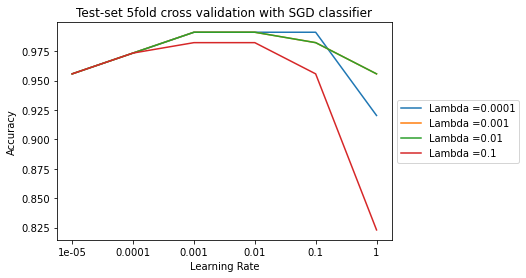

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# Load the data
cancer = load_breast_cancer()

#now scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


est_test_loss_SGD = np.zeros((len(lr_eta), len(Lambdas) ))
est_test_acc_SGD = np.zeros((len(lr_eta), len(Lambdas) ))

# Logistic Regression
for n_lr,lr in enumerate(lr_eta):
  for n_l,Lambda in enumerate(Lambdas):  
    SGD_logistic = SGDClassifier(loss='log', penalty = 'l2', alpha=Lambda, fit_intercept= False, max_iter=1000,  learning_rate='constant', eta0= lr )  # with cross validation
    SGD_logistic.fit(X_train_scaled, y_train)
    est_test_acc_SGD[n_lr, n_l] = SGD_logistic.score(X_test_scaled,y_test)
    est_test_loss_SGD[n_lr, n_l] = log_loss(y_test, SGD_logistic.predict_proba(X_test_scaled))

print('Test Accuracy : \n', est_test_acc_SGD )
print('Test loss : \n', est_test_loss_SGD)

for n_l,Lambda in enumerate(Lambdas): 
  plt.plot(est_test_loss_SGD[:,n_l], label = 'Lambda ='+ str(Lambda))
  plt.xlabel('Learning Rate')
  plt.ylabel('Cross-entropy/Log-likelihood Loss')
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.xticks(np.arange(len(lr_eta)), lr_eta )
plt.title('Test-set 5fold cross validationwith SGD classifier')
plt.show()

for n_l,Lambda in enumerate(Lambdas): 
  plt.plot(est_test_acc_SGD[:,n_l], label = 'Lambda ='+ str(Lambda))
  plt.xlabel('Learning Rate')
  plt.ylabel('Accuracy')
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  plt.xticks(np.arange(len(lr_eta)), lr_eta )
plt.title('Test-set 5fold cross validation with SGD classifier')
plt.show()